## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k
from tqdm import tqdm

C:\Users\utkar\AppData\Local\Temp\ipykernel_26008\844081130.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data

In [2]:
from keras.preprocessing.image import ImageDataGenerator, load_img

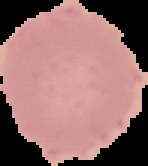

In [3]:
load_img("C:/Users/utkar/Downloads/Malaria cell Dataset/Malarial Cell Image Data/malarial_cell_image_data/cell_images/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_55.png")

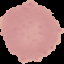

In [4]:
load_img("C:/Users/utkar/Downloads/Malaria cell Dataset/Malarial Cell Image Data/malarial_cell_image_data/cell_images/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_55.png", target_size=(64,64))

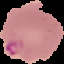

In [5]:
load_img("C:/Users/utkar/Downloads/Malaria cell Dataset/Malarial Cell Image Data/cell_images/Parasitized/C99P60ThinF_IMG_20150918_142334_cell_8.png",target_size = (64,64))

In [6]:
os.environ['KERAS-BACKEND'] = 'tensorflow'
np.random.seed(312)

In [7]:
img_dir = 'C:/Users/utkar/Downloads/Malaria cell Dataset/Malarial Cell Image Data/malarial_cell_image_data/cell_images/'
size = 64
dataset = []
label = []

In [8]:
parasitized_img = os.listdir(img_dir+'Parasitized/')
for i, img_name in (enumerate(tqdm(parasitized_img))):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(img_dir+'Parasitized/'+img_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((size,size))
        dataset.append(np.array(image))
        label.append(0)

100%|████████████████████████████████████████████████████████████████████████████| 13780/13780 [05:54<00:00, 38.87it/s]


In [9]:
uninfected_img = os.listdir(img_dir+'Uninfected/')
for i, img_name in (enumerate(tqdm(uninfected_img))):
    if(img_name.split('.')[1] == 'png'):
        image = cv2.imread(img_dir+'Uninfected/'+img_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((size,size))
        dataset.append(np.array(image))
        label.append(1)

100%|████████████████████████████████████████████████████████████████████████████| 13780/13780 [05:46<00:00, 39.76it/s]


In [10]:
len(parasitized_img)

13780

In [11]:
len(uninfected_img)

13780

In [12]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2, random_state = 0)

In [13]:
xtrain

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

## CNN Model Architecture

In [21]:
Input_shape = (size,size,3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)

In [22]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_19 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248 

In [27]:
history = model.fit(np.array(xtrain),ytrain,
                   batch_size= 64,verbose=1,epochs = 15,validation_split=0.1,shuffle=False)

Epoch 1/15
311/311 [==============================] - 60s 191ms/step - loss: 0.0935 - accuracy: 0.9663 - val_loss: 0.1320 - val_accuracy: 0.9556
Epoch 2/15
311/311 [==============================] - 60s 193ms/step - loss: 0.0903 - accuracy: 0.9665 - val_loss: 0.1551 - val_accuracy: 0.9542
Epoch 3/15
311/311 [==============================] - 60s 194ms/step - loss: 0.0823 - accuracy: 0.9700 - val_loss: 0.1817 - val_accuracy: 0.9519
Epoch 4/15
311/311 [==============================] - 63s 202ms/step - loss: 0.0764 - accuracy: 0.9710 - val_loss: 0.1439 - val_accuracy: 0.9524
Epoch 5/15
311/311 [==============================] - 61s 197ms/step - loss: 0.0728 - accuracy: 0.9746 - val_loss: 0.1543 - val_accuracy: 0.9515
Epoch 6/15
311/311 [==============================] - 60s 194ms/step - loss: 0.0684 - accuracy: 0.9745 - val_loss: 0.2211 - val_accuracy: 0.9528
Epoch 7/15
311/311 [==============================] - 61s 196ms/step - loss: 0.0615 - accuracy: 0.9785 - val_loss: 0.1385 - val_ac

In [28]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

173/173 [==============================] - 5s 27ms/step - loss: 0.1632 - accuracy: 0.9516
Test accuracy: 95.16%


In [26]:
model.save(r'C:\Users\utkar\Downloads\Malaria cell Dataset\Malarial Cell Image Data\Malaria_cell_detection.h5')

C:\Users\utkar\OneDrive\Desktop\TfEnv\tfenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
